In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
os.system("pip install ipywidgets")
os.system("pip install ipympl")
from ipywidgets import *

# Absorvedor dinâmico de vibracoes

## Introdução

Seja o sistema massa-mola-amortecedor unidimensional dado por

$$
m \cdot \ddot{x} + c\cdot \dot{x} + k \cdot x = f \ \ \ \ \ \ \ \ \ \ \ \ \ \ (1) 
$$

Este sistema é subamortecido com frequência natural $\omega_n$ e coeficiente de amortecimento $\xi \in \left[0, \ 1\right)$

$$
\omega_n = \sqrt{\dfrac{k}{m}} \ \ \ \ \ \ \ \ \ \xi = \dfrac{c}{2\sqrt{km}}\ \ \ \ \ \ \ \ \ \ \mu = \sqrt{1-\mu^2}
$$

Agora definimos $2$ funções, $G(\omega)$ e $H(\omega)$ que nos auxiliará posteriormente:

$$
G(\omega) = \dfrac{kx}{f} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
H(\omega) = \dfrac{m\ddot{x}}{f}
$$

## Forçamento harmônico

Vamos primeiramente analisar o sistema sujeito à uma força harmônica

$$
f = f_0 \cdot \exp (i\omega t)
$$

Como queremos encontrar apenas a função $x$, desconsiderando o regime transiente, então obtemos

$$
x = X(\omega) \cdot \exp \left(i\omega t\right)
$$

Que colocando na Equação $(1)$ obtemos

$$
\left[-m\omega^2 + ic \omega + k \right] \cdot X(\omega) \cdot \exp (i\omega t)= f_0 \cdot \exp (i \omega t)
$$
$$
X(\omega) = \dfrac{f_0}{k+ic\omega - m\omega^2}
$$

Neste caso, podemos reescrever as funções $G$ e $H$ de forma:

$$
G(\omega) = \dfrac{k}{k+ic \omega - m\omega^2} = \dfrac{1}{1+2i\xi r-r^2}
$$
$$
H(\omega) = \dfrac{-m\omega^2}{k+ic\omega-m\omega^2} = \dfrac{-r^2}{1+2i\xi r-r^2}
$$

com $r=\omega/\omega_n$.

Vemos que podemos reescrever $X(\omega)$ de modo

$$
X(\omega) = \dfrac{f_0}{k} \cdot G(\omega) = \dfrac{-f_0}{m\omega^2} \cdot H(\omega)
$$

Agora plotamos as funções $G$ e $H$ para diferentes $\xi$ conforme mostra abaixo

In [2]:
rplot = np.linspace(0.01, 3, 1025)
xivals = [0.1, 0.3, 0.6, 0.8]

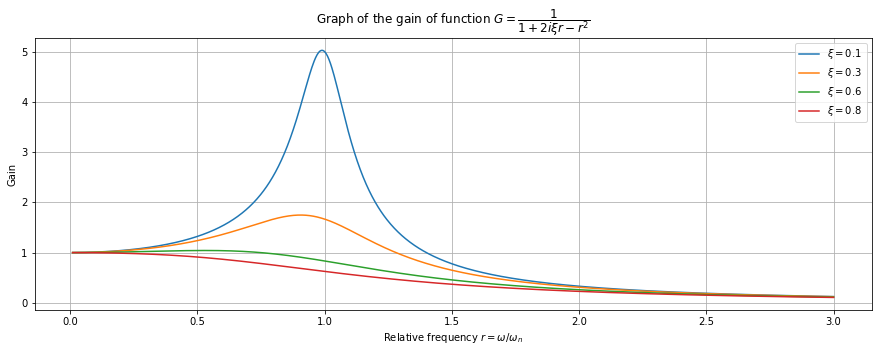

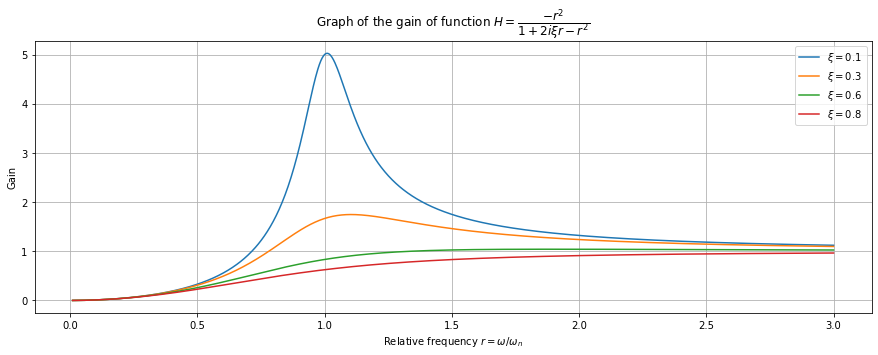

In [3]:
fig1 = plt.figure(figsize=(15, 5))
ax1 = plt.gca()
fig2 = plt.figure(figsize=(15, 5))
ax2 = plt.gca()
for xi in xivals:
    G = 1/(1+2j*xi*rplot-rplot**2)
    H = -rplot**2/(1+2j*xi*rplot-rplot**2)
    ax1.plot(rplot, np.abs(G), label=r"$\xi=%.1f$"%xi)
    ax2.plot(rplot, np.abs(H), label=r"$\xi=%.1f$"%xi)
ax1.set_xlabel(r"Relative frequency $r = \omega/\omega_n$")
ax1.set_ylabel(r"Gain")
ax1.set_title(r"Graph of the gain of function $G = \dfrac{1}{1+2i\xi r-r^2}$")
ax1.legend()
ax1.grid()
ax2.set_xlabel(r"Relative frequency $r = \omega/\omega_n$")
ax2.set_ylabel(r"Gain")
ax2.set_title(r"Graph of the gain of function $H = \dfrac{-r^2}{1+2i\xi r-r^2}$")
ax2.legend()
ax2.grid()


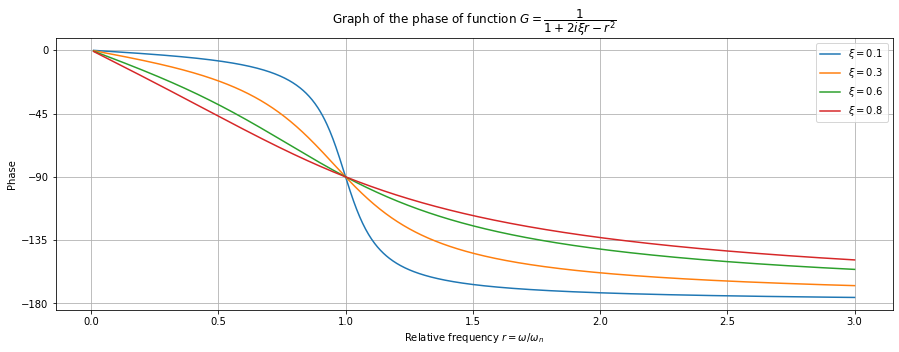

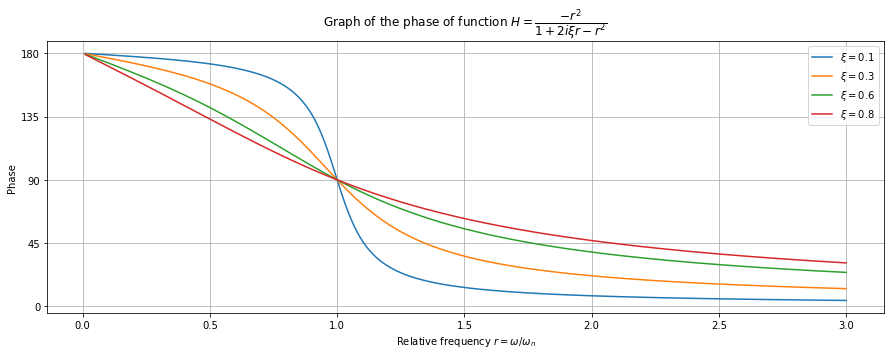

In [4]:
fig1 = plt.figure(figsize=(15, 5))
ax1 = plt.gca()
fig2 = plt.figure(figsize=(15, 5))
ax2 = plt.gca()
for xi in xivals:
    G = 1/(1+2j*xi*rplot-rplot**2)
    H = -rplot**2/(1+2j*xi*rplot-rplot**2)
    ax1.plot(rplot, 180*np.angle(G)/np.pi, label=r"$\xi=%.1f$"%xi)
    ax2.plot(rplot, 180*np.angle(H)/np.pi, label=r"$\xi=%.1f$"%xi)
ax1.set_xlabel(r"Relative frequency $r = \omega/\omega_n$")
ax1.set_ylabel(r"Phase")
ax1.set_title(r"Graph of the phase of function $G = \dfrac{1}{1+2i\xi r-r^2}$")
ax1.set_yticks([0, -45, -90, -135, -180])
ax1.legend()
ax1.grid()
ax2.set_xlabel(r"Relative frequency $r = \omega/\omega_n$")
ax2.set_ylabel(r"Phase")
ax2.set_title(r"Graph of the phase of function $H = \dfrac{-r^2}{1+2i\xi r-r^2}$")
ax2.set_yticks([0, 45, 90, 135, 180])
ax2.legend()
ax2.grid()


## Adição do amortecedor harmônico

Agora colocamos os antigos valores de $k$, $c$ e $m$ como $k_1$, $c_1$ e $m_1$.

Então agora vamos analisar o sistema quando adicionamos um outro sistema massa-mola-amortecedor de parâmetros $k_2$, $c_2$ e $m_2$. 

#### Colocar imagem aqui


Fazendo a formulação matricial temos o sistema dado por

$$
\underbrace{\begin{bmatrix}
m_1 & \\
& m_2
\end{bmatrix}}_{\left[M\right]} \cdot \underbrace{\begin{bmatrix}
\ddot{x}_1 \\ \ddot{x}_2
\end{bmatrix}}_{\left\{\ddot{x}\right\}} + \underbrace{\begin{bmatrix}
c_1+c_2 & -c_2 \\
-c_2 & c_2
\end{bmatrix}}_{\left[C\right]} \cdot \underbrace{\begin{bmatrix}
\dot{x}_1 \\ \dot{x}_2
\end{bmatrix}}_{\left\{\dot{x}\right\}} + \underbrace{\begin{bmatrix}
k_1+k_2 & -k_2 \\
-k_2 & k_2
\end{bmatrix}}_{\left[K\right]} \cdot \underbrace{\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}}_{\left\{x\right\}} = \underbrace{\begin{bmatrix}
f_1 \\ f_2
\end{bmatrix}}_{\left\{f\right\}}
$$

$$
\left[M\right] \cdot \{\ddot{x}\} + \left[C\right] \cdot \{\dot{x}\} + \left[K\right] \cdot \{x\} = \{f\}
$$

Supondo que 

$$
\{f\} = \{f_0\} \cdot \exp(i\omega t)
$$

Neste caso

$$
\{x\} = \{X(\omega)\} \cdot \exp (i\omega t)
$$

$$
\underbrace{\left(-\omega^2 [M] + i\omega [C] + [K]\right)}_{[A(\omega)]} \cdot \left\{X(\omega)\right\} \cdot \exp (i\omega t) = \{f_0\} \cdot \exp (i \omega t)
$$

$$
\left\{X(\omega)\right\} = \left[A(\omega)\right]^{-1} \{f_0\}
$$

Fazendo a expansão de $[A(\omega)]$ temos

$$
\left[A(\omega)\right] = \begin{bmatrix}
-\omega^2 m_1 + i\omega (c_1+c_2) + (k_1+k_2) & -i\omega c_2 - k_2 \\
-i\omega c_2 - k_2 & -\omega^2 m_2 +i\omega c_2 + k_2
\end{bmatrix}
$$

Como

$$
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}^{-1} =
\dfrac{1}{ad-bc}
\begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}
$$

Então

$$
\begin{bmatrix}
X_1 \\ X_2
\end{bmatrix} =
\dfrac{1}{\det [A]} \cdot \begin{bmatrix}
-\omega^2 m_2 +i\omega c_2 + k_2 & i\omega c_2 + k_2 \\
i\omega c_2 + k_2 & -\omega^2 m_1 + i\omega (c_1+c_2) + (k_1+k_2)
\end{bmatrix} \cdot 
\begin{bmatrix}
f_{01} \\ f_{02}
\end{bmatrix}
$$
$$
\det [A] = \left( (k_1+k_2)+i\omega (c_1+c_2) - \omega^2m_1\right)\cdot \left(k_2+i\omega c_2-\omega^2 m_2\right)-\left(k_2+i\omega c_2\right)^2
$$

In [13]:
import sympy as sp

m1, c1, k1, m2, c2, k2 = sp.symbols("m1 c1 k1 m2 c2 k2", real=True, positive=True)
r = sp.symbols("r", real=True, positive=True)
i = sp.I

p, w1, b1, b2, r2 = sp.symbols("p w1 b1 b2 r2", real=True, positive=True)

m2 = p*m1
k1 = m1*(w1**2)
c1 = m1*b1
c2 = m2*b2
w2 = r2*w1
k2 = m2*(w2**2)
w = r*w1
# w = sp.symbols("w", real=True, positive=True)

a = (k1+k2) + i*w*(c1+c2)-m1*w**2
d = k2+i*w*c2-m2*w**2
b = c = -k2-i*w*c2
detA = a*d-b*c
nume = d
d2num = sp.expand(nume * sp.conjugate(nume))
d2den = sp.expand(detA * sp.conjugate(detA))
derivada = sp.diff(d2num, r)*d2den - d2num*sp.diff(d2den, r)
derivada = sp.expand(derivada)
derivada = sp.simplify(derivada)
derivada /= r
derivada = sp.simplify(derivada)
derivada /= -4*m1**6*p**4*w1**12
derivada = sp.simplify(derivada)
y = sp.symbols("y", real=True, positive=True)
derivada = derivada.subs(r**2, y)
derivada = sp.simplify(derivada)
print(derivada)
poly = sp.Poly(derivada, y)
print(poly)

(b1**2*b2**4*y**2 + 2*b2**2*w1**2*y*(b1**2*r2**4 - 2*b1**2*r2**2*y + b1**2*y**2 + 2*b1*b2*p*y**2 + b2**2*p**2*y**2 + 2*b2**2*p*y**2 - b2**2*p*y + b2**2*y**2 - b2**2*y) + 2*w1**6*(p**2*r2**8*y - p**2*r2**6*y**2 + 2*p*r2**8*y - p*r2**8 - 5*p*r2**6*y**2 + 2*p*r2**6*y + 4*p*r2**4*y**3 - p*r2**4*y**2 - p*r2**2*y**4 + r2**8*y - r2**8 - 4*r2**6*y**2 + 4*r2**6*y + 6*r2**4*y**3 - 6*r2**4*y**2 - 4*r2**2*y**4 + 4*r2**2*y**3 + y**5 - y**4) + w1**4*(b1**2*r2**8 - 4*b1**2*r2**6*y + 6*b1**2*r2**4*y**2 - 4*b1**2*r2**2*y**3 + b1**2*y**4 + 6*b1*b2*p*r2**4*y**2 - 8*b1*b2*p*r2**2*y**3 + 2*b1*b2*p*y**4 + 4*b2**2*p**2*r2**4*y**2 - 4*b2**2*p**2*r2**2*y**3 + b2**2*p**2*y**4 + 8*b2**2*p*r2**4*y**2 - 4*b2**2*p*r2**4*y - 12*b2**2*p*r2**2*y**3 + 6*b2**2*p*r2**2*y**2 + 2*b2**2*p*y**4 + 4*b2**2*r2**4*y**2 - 4*b2**2*r2**4*y - 8*b2**2*r2**2*y**3 + 8*b2**2*r2**2*y**2 + 4*b2**2*y**4 - 4*b2**2*y**3))/(2*w1**6)
Poly(y**5 + (b1**2 + 2*b1*b2*p + b2**2*p**2 + 2*b2**2*p + 4*b2**2 - 2*p*r2**2*w1**2 - 8*r2**2*w1**2 - 2*w1**2)/

No caso de $f_{02} = 0$ então

$$
X_1(\omega) = \dfrac{-\omega^2 m_2 +i\omega c_2 +k_2}{\det [A]} \cdot f_{01}
$$
$$
X_2(\omega) = \dfrac{i\omega c_2 +k_2}{\det [A]} \cdot f_{01}
$$

Idealmente queremos que $X_1$ (deslocamento do corpo de interesse) seja zero para uma frequência específica $\omega_{op}$. Contudo, isso implicaria que 

$$
c_2 = 0 \ \ \ \ \ \ \ \ \ \ \text{e} \ \ \ \ \ \ \ \ \ \ k_2=m_2 \omega_{op}^2
$$

Às vezes é interessante ter um amortecimento $c_2$, então o nosso objetivo é minimizar a fração

$$
d(k_2, c_2, m_2) = \left|\dfrac{X(\omega)}{f_{01}}\right| = \left|\dfrac{-m_2 \omega_{op}^2 + ic_2\omega_{op}+k_2}{\det [A]}\right|
$$

Mas minimizar tal quatidade é equivalente a minimizar $d^2$, de tal forma que

$$
d^2 = \left(\dfrac{-m_2 \omega_{op}^2 + ic_2\omega_{op}+k_2}{\det [A]}\right) \cdot \overline{\left(\dfrac{-m_2 \omega_{op}^2 + ic_2\omega_{op}+k_2}{\det [A]} \right)}
$$

Fazendo as expansões necessárias obtemos

$$
d^2 = \dfrac{(k_2-m_2\omega_{op}^2)^2+c_2^2 \omega_{op}^2}{\det [A] \cdot \overline{\det [A]}}
$$

Que é uma expressão bem complicada de se expandir.

## Exemplo numérico

Aqui colocamos um exemplo numérico para verificar o comportamento dos gráficos.
Colocaremos $m_1 = 1$ e $k_1=1$ para a frequência natural ser $1$ e então interpretar os resultados como frequência relativa.

Temos então os  *sliders*.

interactive(children=(FloatSlider(value=0.2, description='xi1', max=1.0, step=0.01), FloatSlider(value=0.1, de…

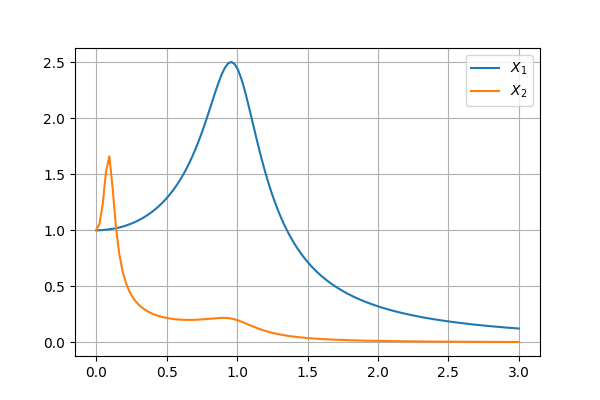

In [31]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4))
ax.grid(True)
 
m1 = k1 = wn1 = 1
r = np.linspace(0, 3, 129)
ax.set_ylim(ymin=0)
ax.set_xlim((min(r), max(r)))


def computeXs(m1: float, c1: float, k1: float, m2: float, c2: float, k2: float, w: np.ndarray):
    M = np.array([[m1, 0], [0, m2]])
    C = np.array([[c1+c2, -c2], [-c2, c2]])
    K = np.array([[k1+k2, -k2], [-k2, k2]])
    F0 = [1, 0]
    wi = 0.5
    resultado = np.array([ np.linalg.lstsq(K+1j*C*wi-M*wi**2, F0)[0] for wi in w]).T
    print(resultado.shape)
    return resultado
 
@widgets.interact(xi1=(0, 1, 0.01), m2=(0, 1, 0.01), xi2=(0, 1, 0.01), wn2=(0, 2, 0.01))
def update(xi1=0.2, m2=0.1, xi2=0.4, wn2=0.1):
    c1 = 2*xi1*np.sqrt(k1*m1)
    m2 *= m1
    wn2 *= wn1
    k2 = m2*wn2**2
    c2 = 2*xi2*np.sqrt(k2*m2)
    w = r * wn1
    X1, X2 = computeXs(m1, c1, k1, m2, c2, k2, w)
    [l.remove() for l in ax.lines]
    ax.clear()
    # ax.plot(np.real(X1), np.imag(X1), color='tab:blue', label=r"$X_1$")
    # ax.plot(np.real(X1), np.imag(X2), color='tab:orange', label=r"$X_2$")
    ax.plot(r, np.abs(X1), color='tab:blue', label=r"$X_1$")
    ax.plot(r, np.abs(X2), color='tab:orange', label=r"$X_2$")
    ax.legend()
    ax.grid()